# En este Notebook recordaremos los conceptos mas importantes de estadistica para Machine Learning

## Medidas centralizadas

In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
#Create datasets

import random
random.seed(0)
x = (random.sample(range(1000),60))

### Media Aritmetica
Es el promedio de todos los valores
* Simbolo es igual a Me

In [3]:
def media_arit(x):
    media = 0
    for i in x[:]:
        media += i
    return media/len(x)

In [4]:
print(media_arit(x))
print(np.mean(x))

559.4166666666666
559.4166666666666


### Mediana:
Es el valor medio de todo el arreglo de valores
* Si no existe un unico valor medio, es el promedio de los dos valores
* Simbolo igual a m

In [5]:
def mediana(x):
    x = sorted(x)
    valor_medio = len(x)/2
    if((valor_medio/int(valor_medio)) == 0.5):
        valor_mayor = math.ceil(valor_medio)
        valor_menor = math.floor(valor_medio)
        return x[valor_mayor]/x[valor_menor]
    else:
        return x[int(valor_medio)]

In [6]:
print(mediana(x))
print(np.median(x))

565
555.0


### Moda
Es el valor que mas se repite
* Simbolo igual a M

In [7]:
def moda(x):
    max = 0
    for i in x:
        if(x.count(i) > max):
            max = x.count(i)
            value = i
    return value

In [8]:
from scipy import stats
print(moda(x))
print(stats.mode(x))

864
ModeResult(mode=array([41]), count=array([1]))


### Percentiles
    P(X <= xp) = p / p ∈ [0,1]
    
Probabilida de que aparezca ese valor o uno menor

In [9]:
print(np.percentile(x,25)) #return 0.25, e.g 1er cuantil

321.5


## Medidas de Dispercion

La varianza y desviacion tipica, nos indica si los valores se desplazan mucho o poco con respecto de la media.

### Varianza

S^2 = (Σ (Xi - XMe)^2 ) / (n - 1)

In [10]:
def varianza(x):
    var = 0
    media = media_arit(x)
    for i in x:
        var = (i - media)**2 + var
    return var/(len(x)-1)

In [11]:
print(varianza(x))
print(np.var(x))

83909.56920903958
82511.07638888889


### Desviacion Tipica

S = sqrt(s^2)

In [12]:
def desv_tipica(x):
    return varianza(x) ** 0.5

In [13]:
print(desv_tipica(x))
print(np.std(x))

289.67148497744745
287.2474131979066


### Coeficiente de Variacion

Cv = 8/Me * 100

In [14]:
def coef_var(x):
    return desv_tipica(x)/media_arit(x) * 100

In [15]:
print(coef_var(x))
print((np.std(x)/np.mean(x))*100)

51.78098941947519
51.34766808245016


## Medidas Asimetricas

Momentos de orden r, respecto a la media El momento de orden r. Son los momentos de distribucion respecto de la media

In [27]:
def momento_de_orde(x,r):
    media = media_arit(x)
    aux = 0
    for i in x:
        aux = (i - media)**r + aux
    if(r > 3):
        n = r - 1
    else:
        n=r
    return aux/(len(x)* (desv_tipica(x)**r)) - n
##para caso de orden superior a 3

### Asimetria de Fisher

### momento de orden 3

CAf = (Σ (Xi - XMe)^3 ) / (n * S^3)

* Si el coeficiente es = 0; Significa que vuestra función es perfectamente simetríca, se distribuye igual, por ejemplo la distribución normal. Raro es que salga cero
* Si el coeficiente es >0; Significa que cuánto más positivo es este valor más desplazada está la distribución hacía la izquierda, de modo que tenemos una asimetría positiva, nos queda la media muy por encima de la distribución.
* Si el el coeficiente es <0; Significa que cuánto más negativo es este valor más desplazado está la distribución hacía la derecha, de modo que tenemos una asimetría negativa, nos queda la media muy por debajo de la distribución.

In [16]:
import scipy.stats as sp # para modelos de asimetria

In [28]:
# 3rd Moment: Asimetría de Fisher
Asimetria=sp.skew(x)
print(momento_de_orde(x,3))
print(Asimetria)

-3.109391770828827
-0.1121846689850033


### Curtosis

#### momento de orden 4

* =0 Mesocúrtica Distribución perfecta, asemejada a la distribución normal en forma, no en valores. Está compensado tanto el centro como las colas.
* />0 Leptocúrtica Distribución donde se le concentran mucho los datos en el valor central, y apenas tiene cola.
* <0 Platicúrtica Distribución donde hay pocos valores que se concentren respecto al valor central (media) y hay muchos que aparecen hacia las colas, se concentran más en los laterales. Existe valor central, pero también hay mucha presencia de colas directamente en la distribución de nuestros datos.

In [29]:
# 4th Moment: Curtosis
curtosis=sp.kurtosis(x)
print(momento_de_orde(x,4))
print(curtosis)

-1.2992275879771986
-1.2410856985687766


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 5.,  5.,  6.,  5.,  6.,  6.,  5.,  4.,  7., 11.]),
 array([ 41., 136., 231., 326., 421., 516., 611., 706., 801., 896., 991.]),
 <a list of 10 Patch objects>)

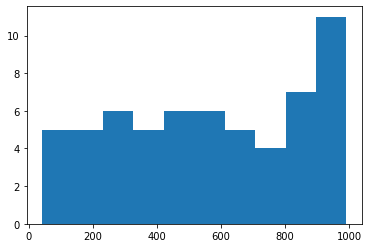

In [33]:
plt.hist(x)

# Muestreo
Poblacion = S

Muestra X subconjunto de S

{ X1 , X2 , ... , Xn} = X

n = cantidad de muestra

Simbolos matematicos:
* http://www.fao.org/3/w5448s/w5448s02.htm
* Principales:
    * Mu: Media Poblacion
    * Sigma : Desviacion Tipica
    * p : Proporcion Poblacion
    * x' : Media Muestral
    * s' : Desviacion Tipica
    * p' : Proporcion Muestral

## Teorema central de muestreo

Nosotros podemos obtener una muestra de distribucion de la poblacion donde el grafico sera desconocido, sin embargo si calculamos la media de esa muestra i y la comparamos con nuestras n muestras vamos a obtener una *campana de gauss* (distribucion de la media de la muestras)

* tenemos **[x1, x2, .. xn]** y **p** que va a ser el valor que le corresponde a cada **xi**
* con ese conjunto de valores obtenemos un xMedia y un pMedia. Al conjunto de esos valores vamos a obtener **Mu** (la media de medias) y la desviacion Sigma dividio raiz de **N**

### El contraste de hipotesis:

#### Contrastes bilateral:

* H0 = HIpotesis Nula, lo que intentamos hacer es determinar si cierta hipotesis es real o no.
    * Todo el mundo quiere esta hipotesis porque se pone de acuerdo con lo que uno pensaba
* Luego tenemos a H1 que vendria a ser la hipotesis alternativa, un conjunto de elementos que no fueron previamente analizados

#### Contraste Unilaterales

* H0 = Mu <= Mu0
* H1 = Mu > Mu0
* H0 = Mu => Mu0
* H1 = Mu < Mu0

Valores que no mienten estadisticamente o varian teniendo en cuenta la realidad

**CASO DE UN SIGMA CONOCIDO:**

   * X ~ Normal(Mu0,Simga)
   * Z = XMe - MuXMe / SigmaMe

**CASO CONTRARIO:**
   * X ~ Normal(Mu0,?)
   * **S** = Sum(Xi - MeMuestraXi)^2 / N - 1 --> Sigma
   * Y los datos se distribuyen segun una distribucion **T**
   * T = XMe - Mu / (S/sqrt(n)

#### Calculo de probabilidad
    P( X < Z1) = p1



## Test de Chi Cuadrado

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2

#### Ecuacion:

X^2 = Sum(Oi - Ei)^2 / Ei

Ei = Esperados

Oi = Observados

df = Bondad de ajuste
df = Ncategorias - 1

Dos variables:
* Test de Homogeneidad
* Test de Independencia

df = (Nrow - 1) * (Ncol -1) 